In [ ]:
# Импорт необходимиых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1. Парсинг данных

In [ ]:
# Загрузка данных из репозитория
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
# Приведение типов
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188315 entries, 0 to 188314
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    188315 non-null  object        
 1   continent                                   177358 non-null  object        
 2   location                                    188315 non-null  object        
 3   date                                        188315 non-null  datetime64[ns]
 4   total_cases                                 180857 non-null  float64       
 5   new_cases                                   180587 non-null  float64       
 6   new_cases_smoothed                          179413 non-null  float64       
 7   total_deaths                                162469 non-null  float64       
 8   new_deaths                                  162456 non-null  float64      

Количество пустых значений:

In [ ]:
# Вывод пустых значений
pd.set_option('display.max_rows',None)
df.isnull().sum()

iso_code                                           0
continent                                      10957
location                                           0
date                                               0
total_cases                                     7458
new_cases                                       7728
new_cases_smoothed                              8902
total_deaths                                   25846
new_deaths                                     25859
new_deaths_smoothed                            27021
total_cases_per_million                         8293
new_cases_per_million                           8563
new_cases_smoothed_per_million                  9732
total_deaths_per_million                       26668
new_deaths_per_million                         26681
new_deaths_smoothed_per_million                27838
reproduction_rate                              47987
icu_patients                                  163200
icu_patients_per_million                      

In [ ]:
pd.set_option('display.max_rows',10)

In [ ]:
df.shape

(188315, 67)

 Все данные при парсинге из репозитория были включены. Размерность набора данных составляет `183348 строк` и `67 столбцов`

 Дополним набор данных новой информацией, чтобы в случае необходимости точность модели при обучении была больше. Также новые данные могут пригодиться для того, чтобы включить их в аналих данных, из которого можно вынести некоторые зависимости, если они присутствует. 

 В качестве новых данных возьмём среднее количество смертей и заражённых на регион.

In [ ]:
# Заполнение пустых полей
df[['location', 'new_cases', 'new_deaths']]=df[['location', 'new_cases', 'new_deaths']].fillna(0)

In [ ]:
# Формирование дополнительных атрибутов
grouped_cases=df[['location', 
                  'new_cases', 
                  'new_deaths']].groupby(by="location").mean().rename(columns={'new_cases':'mean_new_cases', 
                                                                               'new_deaths':'mean_new_deaths'})

In [ ]:
grouped_cases

,mean_new_cases,mean_new_deaths
location,,
Afghanistan,219.660147,9.409535
Africa,14252.889023,305.798552
Albania,337.623011,4.280294
Algeria,325.399021,8.414933
Andorra,52.493218,0.191122
...,...,...
Western Sahara,0.000000,0.000000
World,615605.527615,7326.415981
Yemen,15.310881,2.783679


In [ ]:
df=df.merge(grouped_cases, on='location')

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,219.660147,9.409535
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,219.660147,9.409535
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,219.660147,9.409535
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,219.660147,9.409535
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,219.660147,9.409535


Генерация новых данных произведена

## 1.2. Предобработка данных и выделение значимых атрибутов
Заполним все пустые значения нулями

In [ ]:
df=df.fillna(0)

### Определение наиболее значимых атрибутов
Чтобы найти наиболее значимые атрибуты, построим корреляцию Пирсона на тепловой карте

Text(0.5, 1.0, 'Correlation Heatmap')

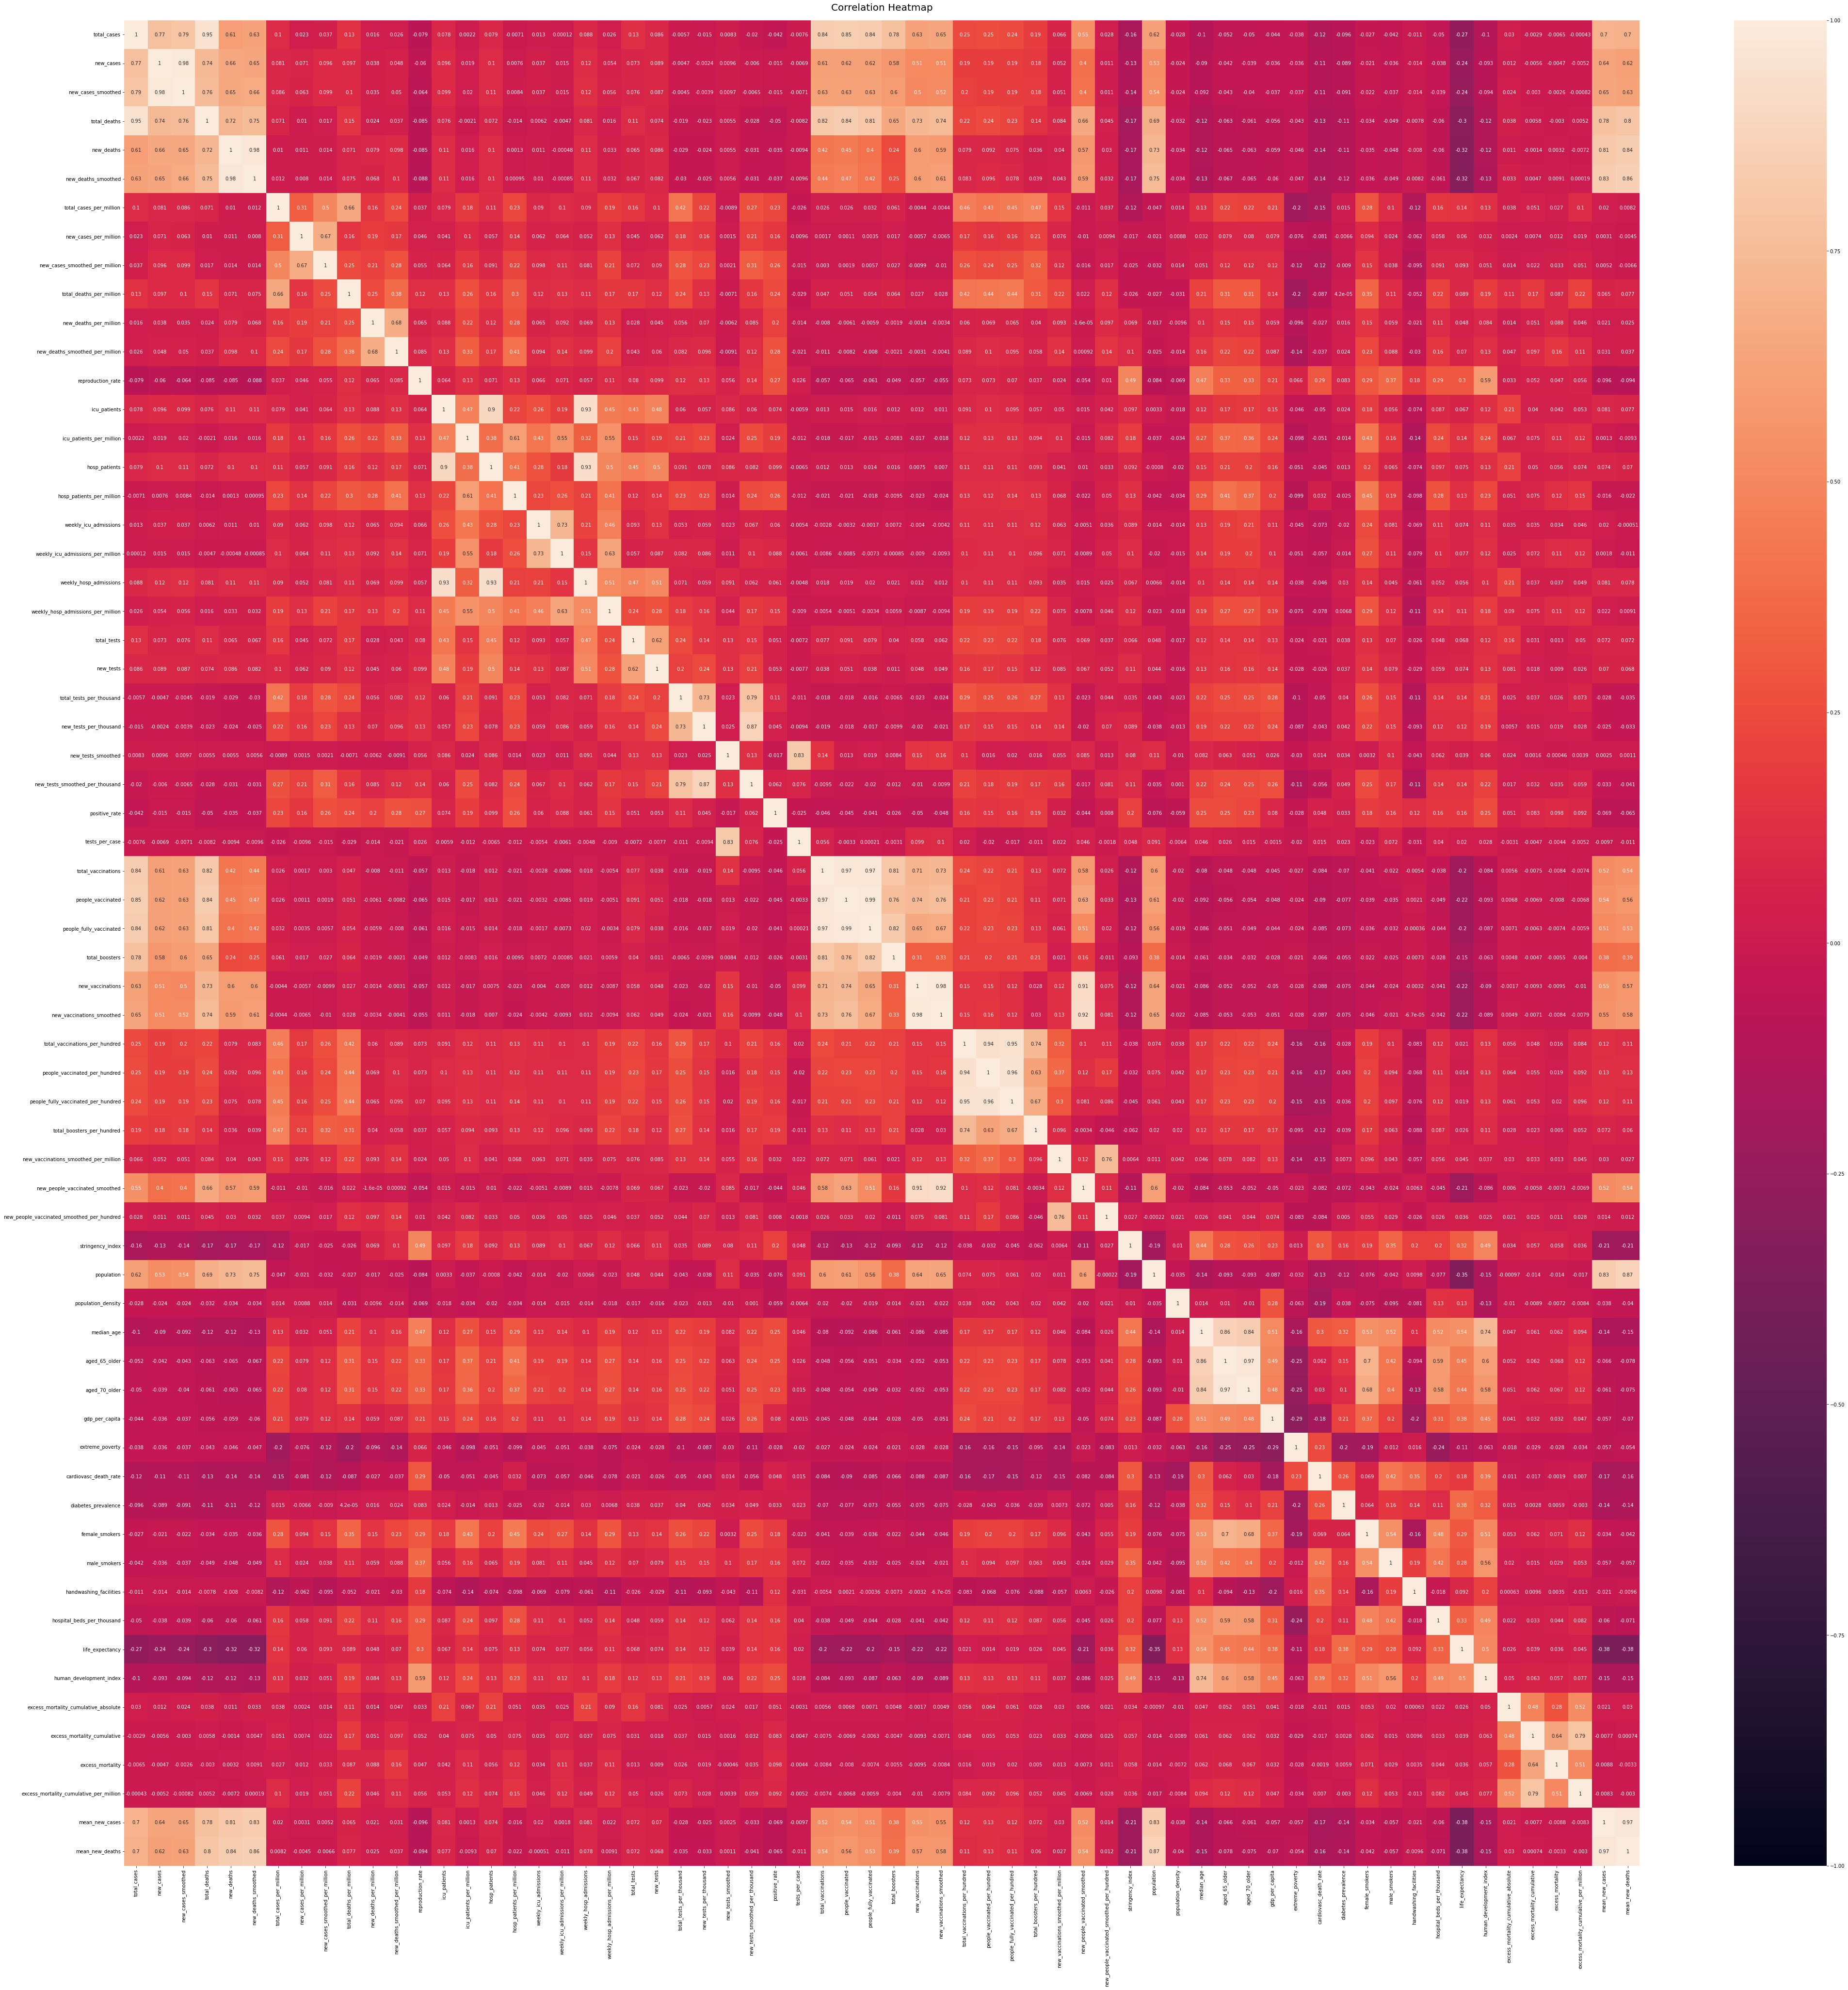

In [ ]:
# Фомирование корреляции Пирсона
corr=df.corr()
plt.figure(figsize=(70, 70))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

Выше мы видим достаточно много признаков имеют высокий коэффициент корреляции, но наиболее значимыми атрибутами являются: `total_casem, new_case, new_cases_smoothed, total_deaths, new_deaths и new_deaths_smoothed`

## 1.3. Описание структуры набора данных

In [ ]:
# Описание каждого атрибута
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183348 entries, 0 to 183347
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    183348 non-null  object        
 1   continent                                   183348 non-null  object        
 2   location                                    183348 non-null  object        
 3   date                                        183348 non-null  datetime64[ns]
 4   total_cases                                 183348 non-null  float64       
 5   new_cases                                   183348 non-null  float64       
 6   new_cases_smoothed                          183348 non-null  float64       
 7   total_deaths                                183348 non-null  float64       
 8   new_deaths                                  183348 non-null  float64      

`total_cases` - Всего подтвержденных случаев COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщается.

`new_cases` - Новые подтвержденные случаи заболевания COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщается. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этой метрики значение NAME.

`new_cases_smoothed` - Новые подтвержденные случаи COVID-19 (7-дневный период сглажен). Подсчеты могут включать вероятные случаи, о которых сообщается.

`total_cases_per_million` - Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщается.

`new_cases_per_million` - Новые подтвержденные случаи COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщается.

`new_cases_smoothed_per_million` - Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщается.

`total_deaths` - Общее число смертей, связанных с COVID-19. Сообщалось, что подсчеты могут включать вероятные смертельные случаи.

`new_deaths` - Новые случаи смерти, связанные с COVID-19. Сообщалось, что подсчеты могут включать вероятные смертельные случаи. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этой метрики значение NAME.

`new_deaths_smoothed` - Новые случаи смерти, связанные с COVID-19 (7-дневный период сглажен). Сообщалось, что подсчеты могут включать вероятные смертельные случаи.

`total_deaths_per_million` - Общее число смертей, связанных с COVID-19, на 1 000 000 человек. Сообщалось, что подсчеты могут включать вероятные смертельные случаи.

`new_deaths_per_million` - Новые случаи смерти, связанные с COVID-19, на 1 000 000 человек. Сообщалось, что подсчеты могут включать вероятные смертельные случаи.

`new_deaths_smoothed_per_million` - Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Сообщалось, что подсчеты могут включать вероятные смертельные случаи.

`excess_mortality` - Процентная разница между зарегистрированным числом еженедельных или ежемесячных смертей в 2020-2021 годах и прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality 

`excess_mortality_cumulative` - Процентная разница между совокупным числом смертей с 1 января 2020 года и совокупным прогнозируемым числом смертей за тот же период, основанным на предыдущих годах. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

`excess_mortality_cumulative_absolute` - Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality избыток

`excess_mortality_cumulative_per_million`- Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет на миллион человек. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

`icu_patients` - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день

`icu_patients_per_million` - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день на 1 000 000 человек

`hosp_patients` - Количество пациентов с COVID-19 в больнице в данный день

`hosp_patients_per_million` - Количество пациентов с COVID-19, находящихся в больнице в данный день на 1 000 000 человек

`weekly_icu_admissions` - Число пациентов с COVID-19, впервые поступивших в отделения интенсивной терапии (ОИТ) за данную неделю

`weekly_icu_admissions_per_million` - Число пациентов с COVID-19, впервые поступивших в отделения интенсивной терапии (ОИТ) за данную неделю на 1 000 000 человек

`weekly_hosp_admissions` - Число пациентов с COVID-19, впервые поступивших в больницы за данную неделю

`weekly_hosp_admissions_per_million` - Число пациентов с COVID-19, впервые поступивших в больницы за данную неделю на 1 000 000 человек

`stringency_index` - Индекс строгости реагирования правительства: сводный показатель, основанный на 9 показателях реагирования, включая закрытие школ, закрытие рабочих мест и запреты на поездки, масштабированный до значения от 0 до 100 (100 = самый строгий ответ)

`reproduction_rate` - Оценка в реальном времени эффективной скорости размножения (R) COVID-19. https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

`total_tests` - Общее количество тестов на COVID-19

`new_tests` - Новые тесты на COVID-19 (рассчитываются только для последовательных дней)

`total_tests_per_thousand` - Общее количество тестов на COVID-19 на 1000 человек

`new_tests_per_thousand` - Новые тесты на COVID-19 на 1000 человек

`new_tests_smoothed` - Новые тесты на COVID-19 (7-дневный сглаженный). Для стран, которые не сообщают данные тестирования на ежедневной основе, мы предполагаем, что тестирование менялось одинаково ежедневно в течение любых периодов, в течение которых данные не сообщались. Это дает полный ряд ежедневных показателей, которые затем усредняются в течение скользящего 7-дневного окна

`new_tests_smoothed_per_thousand` - Новые тесты на COVID-19 (7-дневный сглаженный) на 1000 человек

`positive_rate` - Доля положительных тестов на COVID-19, приведенная в виде скользящего среднего за 7 дней (это обратная величина tests_per_case)

`tests_per_case` - Тесты, проведенные для каждого нового подтвержденного случая COVID-19, приведены в виде скользящего среднего значения за 7 дней (это обратная величина positive_rate)

`tests_units` - Единицы измерения, используемые местоположением для представления своих данных тестирования

`total_vaccinations` - Общее количество доз вакцинации против COVID-19, введенных вакцинированным людям

`people_vaccinated` - Общее число людей, получивших хотя бы одну дозу вакцины

`people_fully_vaccinated` - Общее число людей, получивших все дозы, предписанные первоначальным протоколом вакцинации 

`total_boosters` - Общее количество введенных бустерных доз вакцинации против COVID-19 (дозы, введенные сверх количества, предписанного протоколом вакцинации)

`new_vaccinations` - Вводимые новые дозы вакцинации против COVID-19 (рассчитываются только для последовательных дней)

`new_vaccinations_smoothed` - Введены новые дозы вакцинации против COVID-19 (7-дневный период сглажен). Для стран, которые не сообщают данные о вакцинации на ежедневной основе, мы предполагаем, что вакцинация менялась одинаково ежедневно в течение любых периодов, в течение которых данные не сообщались. Это дает полный ряд ежедневных показателей, которые затем усредняются в течение скользящего 7-дневного окна

`total_vaccinations_per_hundred` - Общее количество доз вакцинации против COVID-19, введенных на 100 человек в общей популяции

`people_vaccinated_per_hundred` - Общее число людей, получивших по крайней мере одну дозу вакцины на 100 человек в общей численности населения

`people_fully_vaccinated_per_hundred`- Общее число людей, получивших все дозы, предписанные протоколом первичной вакцинации, на 100 человек в общей численности населения

`total_boosters_per_hundred` - Общее количество бустерных доз вакцинации против COVID-19, введенных на 100 человек в общей численности населения

`new_vaccinations_smoothed_per_million` - Новые дозы вакцинации против COVID-19, введенные (сглаженные на 7 дней) на 1 000 000 человек от общей численности населения

`new_people_vaccinated_smoothed` - Ежедневное количество людей, получающих свою первую дозу вакцины (сглажено на 7 дней)

`new_people_vaccinated_smoothed_per_hundred` - Ежедневное число людей, получающих первую дозу вакцины (7-дневная сглаженная) на 100 человек в общей численности населения

`iso_code` - ISO 3166-1 alpha-3 – трехбуквенные коды стран

`continent` - Континент географического местоположения

`location` - Географическое положение

`date` - Дата наблюдения

`population` - Численность населения (последние доступные значения). https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv для получения полного списка источников

`population_density` - Количество людей, разделенное на площадь земли, измеренную в квадратных километрах, самый последний год, доступный

`median_age` - Средний возраст населения, прогноз ООН на 2020 год

`aged_65_older` - Доля населения в возрасте 65 лет и старше, последний доступный год

`aged_70_older` - Доля населения в возрасте 70 лет и старше в 2015 году 

`gdp_per_capita` - Валовой внутренний продукт по паритету покупательной способности (постоянный международный доллар 2011 года), последний доступный год

`extreme_poverty` - Доля населения, живущего в крайней нищете, последний год, доступный с 2010 года 

`cardiovasc_death_rate` - Уровень смертности от сердечно-сосудистых заболеваний в 2017 году (годовое число смертей на 100 000 человек)
`diabetes_prevalence` - Распространенность диабета (% населения в возрасте от 20 до 79 лет) в 2017 году

`female_smokers` - Доля курящих женщин, за последний год доступных

`male_smokers` - Доля курящих мужчин, за последний год доступных

`handwashing_facilities` - Доля населения, имеющего базовые средства для мытья рук в помещениях, за последний год количество доступных

`hospital_beds_per_thousand` - Больничные койки на 1000 человек, последний доступный год с 2010 года

`life_expectancy` - Ожидаемая продолжительность жизни при рождении в 2019 году

`human_development_index` - Сводный индекс, измеряющий средние достижения в трех основных аспектах человеческого развития — долгая и здоровая жизнь, знания и достойный уровень жизни. Значения за 2019 год, импортированные из http://hdr.undp.org/en/indicators/137506

### Пустые значения

Пустые значения были предобработанны ранее, после предобработки их больше не осталось

In [ ]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million               

In [ ]:
pd.set_option('display.max_rows',10)

### Плотность распределения данных
Сформируем графики плотностей для каждого признака

In [ ]:
df.head()

NameError: ignored

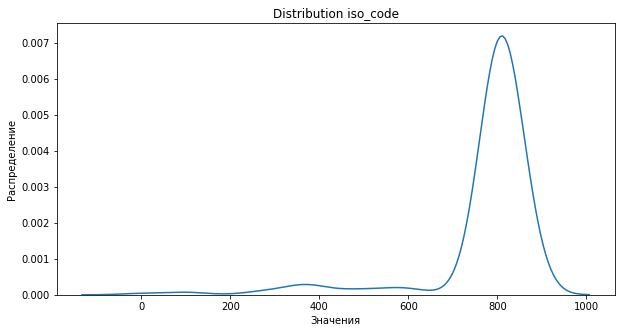

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['iso_code'].value_counts())
plt.title('Distribution iso_code')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['continent'].value_counts())
plt.title('Distribution continent')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['location'].value_counts())
plt.title('Distribution location')
plt.xlabel('Значение')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Функция вывода распределения каждого атрибута, являющегося численным признаком
def plot(column):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column])
    plt.title('Distribution '+column)
    plt.xlabel('Значения')
    plt.ylabel('Распределение')
    plt.show()

In [ ]:
#Применение функции
for column in df[:100].select_dtypes(exclude=['object']).columns:
    plot(column)

In [ ]:
df.head()

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['iso_code'].value_counts())
plt.title('Distribution iso_code')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['continent'].value_counts())
plt.title('Distribution continent')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной
plt.figure(figsize=(10, 5))
sns.kdeplot(df['location'].value_counts())
plt.title('Distribution location')
plt.xlabel('Значение')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Функция вывода распределения каждого атрибута, являющегося численным признаком
def plot(column):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column])
    plt.title('Distribution '+column)
    plt.xlabel('Значения')
    plt.ylabel('Распределение')
    plt.show()

In [ ]:
# Применение функции
for column in df[:100].select_dtypes(exclude=['object']).columns:
    plot(column)

## 1.4. Формирование дополнительных атрибутов
Сформируем новый атрибут согласно формуле приведённой в задании:

*Rt = число зарегистрированных заболеваний за последние 4 дня / число зарегистрированных заболеваний за предыдущие 4 дня*

In [ ]:
# Алгоритм вычисления нового атрибута Rt
df['Rt']=None
data=pd.DataFrame()
for country in df['location'].value_counts().keys():
    r=df[df['location']==country].copy()
    da=pd.DataFrame()
    for i in range(0, len(r), 8):
        tida=pd.DataFrame()
        su=r['new_cases'].tail(8).tail(4).sum()/r['new_cases'].tail(8).head(4).sum()
        tida=r.tail(8)
        tida['Rt']=su
        r.drop(r.tail(8).index,inplace=True)
        da=da.append(tida)
    data=data.append(da)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [ ]:
data=data.fillna(0)

In [ ]:
data.reset_index(drop=True, inplace=True)
df=data

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths,Rt
0,MEX,North America,Mexico,2022-04-25,5733925.0,140.0,893.857,324134.0,5.0,27.143,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6729.284877,371.968347,0.563587
1,MEX,North America,Mexico,2022-04-26,5735115.0,1190.0,835.000,324173.0,39.0,28.571,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6729.284877,371.968347,0.563587
2,MEX,North America,Mexico,2022-04-27,5736579.0,1464.0,859.857,324221.0,48.0,31.000,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6729.284877,371.968347,0.563587
3,MEX,North America,Mexico,2022-04-28,5737811.0,1232.0,882.286,324254.0,33.0,31.571,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6729.284877,371.968347,0.563587
4,MEX,North America,Mexico,2022-04-29,5738769.0,958.0,1019.143,324294.0,40.0,37.286,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6729.284877,371.968347,0.563587


**Результат алгоритма выше демонстрирует формирование дополнительного атрибута Rt - коэффициент распространения инфекции**

### Анализ возможности определения изменения эпидемиологической
Проанализируем полученные данные для нескольких стран

In [2]:
d=pd.DataFrame({'Russia': [list(df[df['location']=='Russia']['Rt'])[0]], 
                'Mexico':[list(df[df['location']=='Mexico']['Rt'])[0]], 
                'France': [list(df[df['location']=='France']['Rt'])[0]], 
                'Taiwan':[list(df[df['location']=='Taiwan']['Rt'])[0]], 
                'United States':[list(df[df['location']=='United States']['Rt'])[0]], 
                'Japan':[list(df[df['location']=='Japan']['Rt'])[0]], 
                'Canada':[list(df[df['location']=='Canada']['Rt'])[0]], 
                'Singapore':[list(df[df['location']=='Singapore']['Rt'])[0]],}).T

SyntaxError: ignored

**Выведем актуальные Rt - значения для каждой страны**

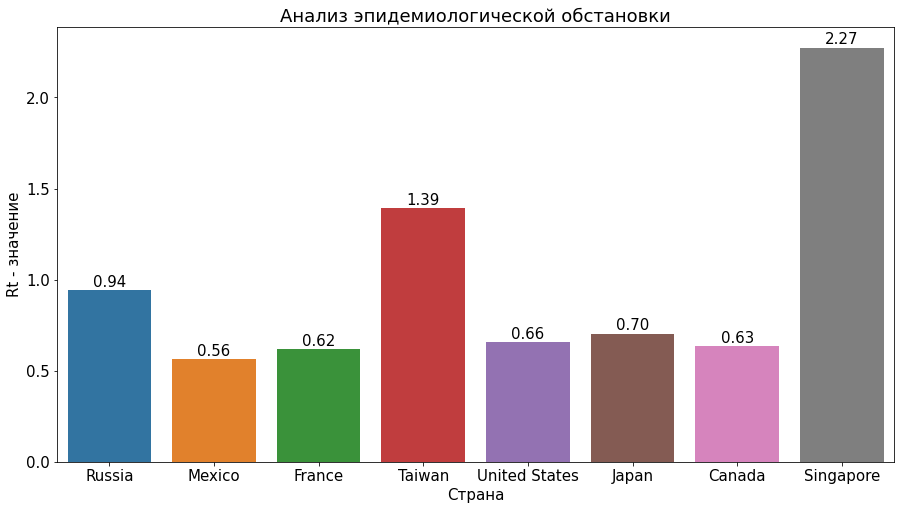

In [ ]:
plt.rcParams.update({'font.size': 15,})
plt.figure(figsize=(15, 8))
plots = sns.barplot(x=d.index, y=d[0], data=df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Анализ эпидемиологической обстановки')
plt.ylabel('Rt - значение')
plt.xlabel('Страна')
plt.show()


Из полученных результатов можно сказать, что максимальное Rt - значение предложенных стран - это Сингапур`(2.27)`. Минимальное - Мексика `(0.56)`. Россия на текущий день имеет Rt значение `0.94` 

## Отчёт

* 1.1 Парсинг данных - Набор данных загружен из репозитория, а также произведенно дополнение некоторыми атрибутами;
*  1.2 Предобработка данных и выделение значимых атрибутов - Набор данных обработан от пустых значений, а также определенны наиболее "важные" атрибуты по корреляции Пирсона;
* 1.3 Описание структуры набора данных - для каждого атрибута представленно описание и плотность распределения данных;
* 1.4 Формирование дополнительных атрибутов - Сформированн дополнительный атрибут Rt, который определяет коэффициента распространения инфекции за последние 8 дней.

In [ ]:
# Сохранение данных
df.to_csv('result_data.csv', encoding='utf-8-sig', index=False)